In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/processed/bank_churn_clean.csv')

# Separar features y target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Modelo 1: Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Comparar resultados
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_lr):.3f}\n")

print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf):.3f}")


Logistic Regression:
Accuracy: 0.999
ROC-AUC: 0.997

Random Forest:
Accuracy: 0.999
ROC-AUC: 0.997


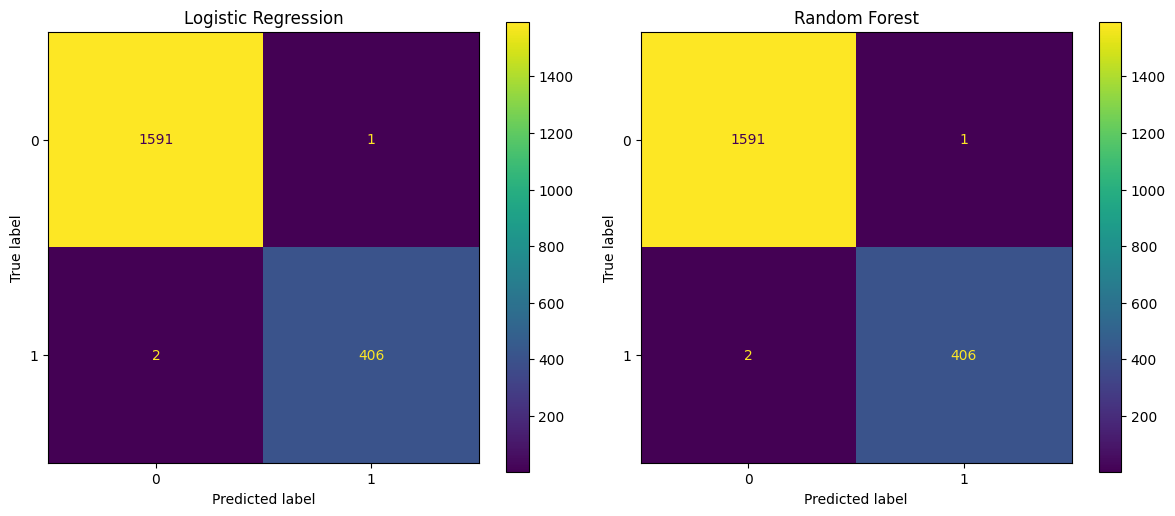

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axes[0])
axes[0].set_title('Logistic Regression')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1])
axes[1].set_title('Random Forest')

plt.tight_layout()
plt.savefig('../reports/figures/confusion_matrices.png', dpi=300)


In [11]:
from sklearn.model_selection import GridSearchCV

# Grid search para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor ROC-AUC: {grid_search.best_score_:.3f}")

# Evaluar modelo optimizado
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred_best):.3f}")


Mejores parámetros: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Mejor ROC-AUC: 1.000
Test ROC-AUC: 0.997


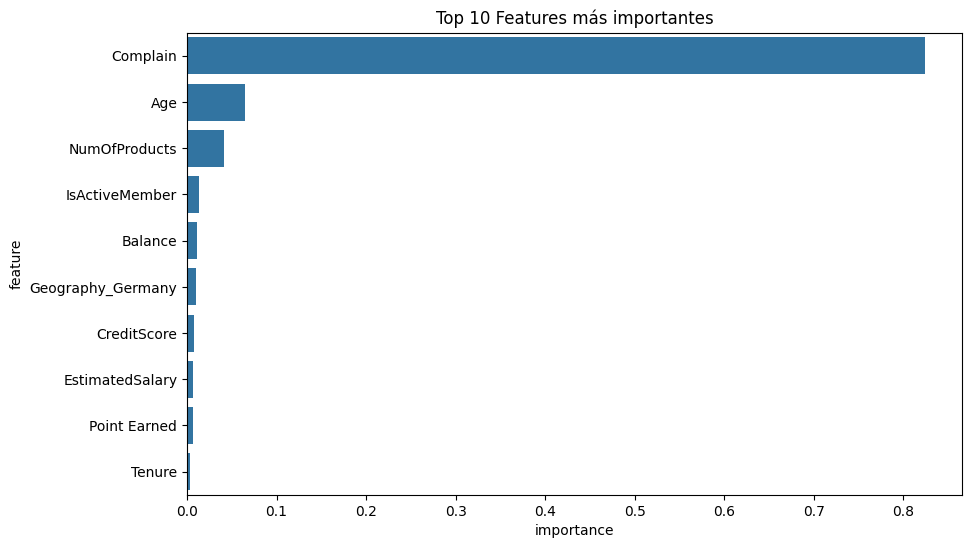

In [12]:
# Importancia de variables
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Features más importantes')
plt.savefig('../reports/figures/feature_importance.png', dpi=300, bbox_inches='tight')
